In [6]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv("CVD Dataset.csv")
df.head()

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,...,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,...,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88


In [9]:
df.info()
#keep only the columns that are relevant
print("Dropping unnecessary columns...")
df_relevant = df[['Sex','Age','Weight (kg)','Height (m)','BMI','Total Cholesterol (mg/dL)','Fasting Blood Sugar (mg/dL)','Smoking Status','Physical Activity Level','CVD Risk Level','Systolic BP','Diastolic BP']].copy()
print("Columns after dropping unnecessary ones:")
print(df_relevant.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [14]:
#Check for missing values
print("Checking for missing values...")
print(df.isnull().sum())

Checking for missing values...
Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
CVD Risk Level                   0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
dtype: int64


In [13]:
#Found that some sys bp and dia bp values are missing
df_relevant['Blood Pressure (mmHg)'] = df['Blood Pressure (mmHg)']
#Fill sys bp col and dia bp col with the values from the blood pressure col
for r in df_relevant.index:
    if pd.isnull(df_relevant.at[r, 'Systolic BP']) or pd.isnull(df_relevant.at[r, 'Diastolic BP']):
        if pd.notnull(df_relevant.at[r, 'Blood Pressure (mmHg)']):
            bp_values = df_relevant.at[r, 'Blood Pressure (mmHg)'].split('/')
            if len(bp_values) == 2:
                df_relevant.at[r, 'Systolic BP'] = float(bp_values[0])
                df_relevant.at[r, 'Diastolic BP'] = float(bp_values[1])
#Check if the values are filled
print("Checking if sys bp and dia bp values are filled...")
print(df_relevant.isnull().sum())

Checking if sys bp and dia bp values are filled...
Sex                             0
Age                            78
Weight (kg)                    81
Height (m)                     67
BMI                            64
Total Cholesterol (mg/dL)      73
Fasting Blood Sugar (mg/dL)    67
Smoking Status                  0
Physical Activity Level         0
CVD Risk Level                  0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure (mmHg)           0
dtype: int64


In [16]:
#For rows where height,weight is present but bmi is not, calculate bmi
for r in df_relevant.index:
    if pd.isnull(df_relevant.at[r,'BMI']) and pd.notnull(df_relevant.at[r,'Weight (kg)'] and pd.notnull(df_relevant.at[r,'Height (m)'])):
        weight = df_relevant.at[r,'Weight (kg)']
        height = df_relevant.at[r,'Height (m)']
        if height > 0:
            df_relevant.at[r,'BMI'] = weight / (height ** 2)
#Check if the values are filled
print("Checking if BMI values are filled...")
print(df_relevant.isnull().sum())


Checking if BMI values are filled...
Sex                             0
Age                            78
Weight (kg)                    81
Height (m)                     67
BMI                             7
Total Cholesterol (mg/dL)      73
Fasting Blood Sugar (mg/dL)    67
Smoking Status                  0
Physical Activity Level         0
CVD Risk Level                  0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure (mmHg)           0
dtype: int64


In [17]:
#Some BMI values are still missing, fill them with the mean of the column
df_relevant['BMI'].fillna(df_relevant['BMI'].mean(), inplace = True)
#Check if the values are filled
print("Checking if BMI values are filled after filling with mean...")
print(df_relevant.isnull().sum())

Checking if BMI values are filled after filling with mean...
Sex                             0
Age                            78
Weight (kg)                    81
Height (m)                     67
BMI                             0
Total Cholesterol (mg/dL)      73
Fasting Blood Sugar (mg/dL)    67
Smoking Status                  0
Physical Activity Level         0
CVD Risk Level                  0
Systolic BP                     0
Diastolic BP                    0
Blood Pressure (mmHg)           0
dtype: int64


C:\Users\Rafid\AppData\Local\Temp\ipykernel_25168\3864867229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_relevant['BMI'].fillna(df_relevant['BMI'].mean(), inplace = True)


## Visualizing Missing Values

<Axes: >

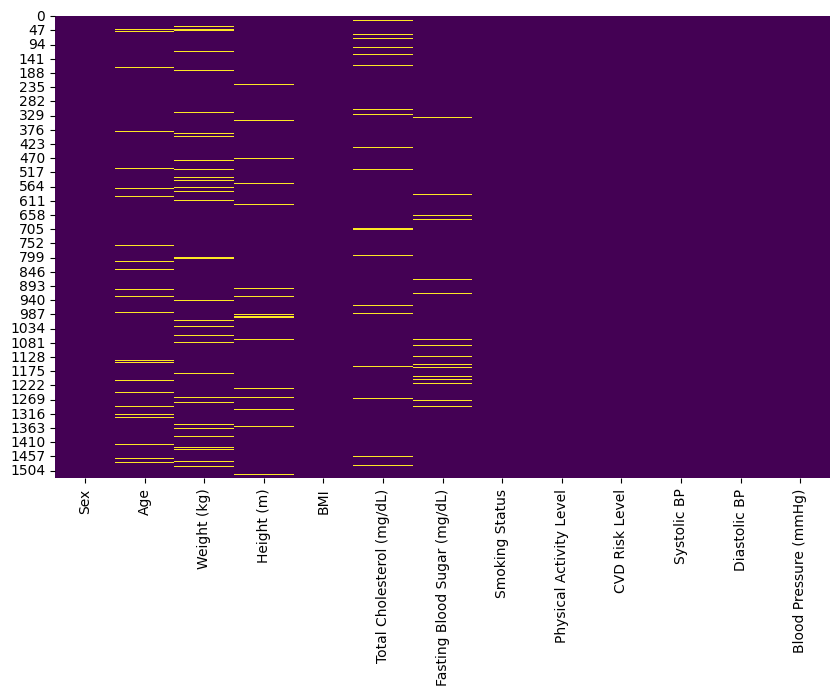

In [18]:
#generate heatmap to visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df_relevant.isnull(), cbar=False, cmap='viridis')

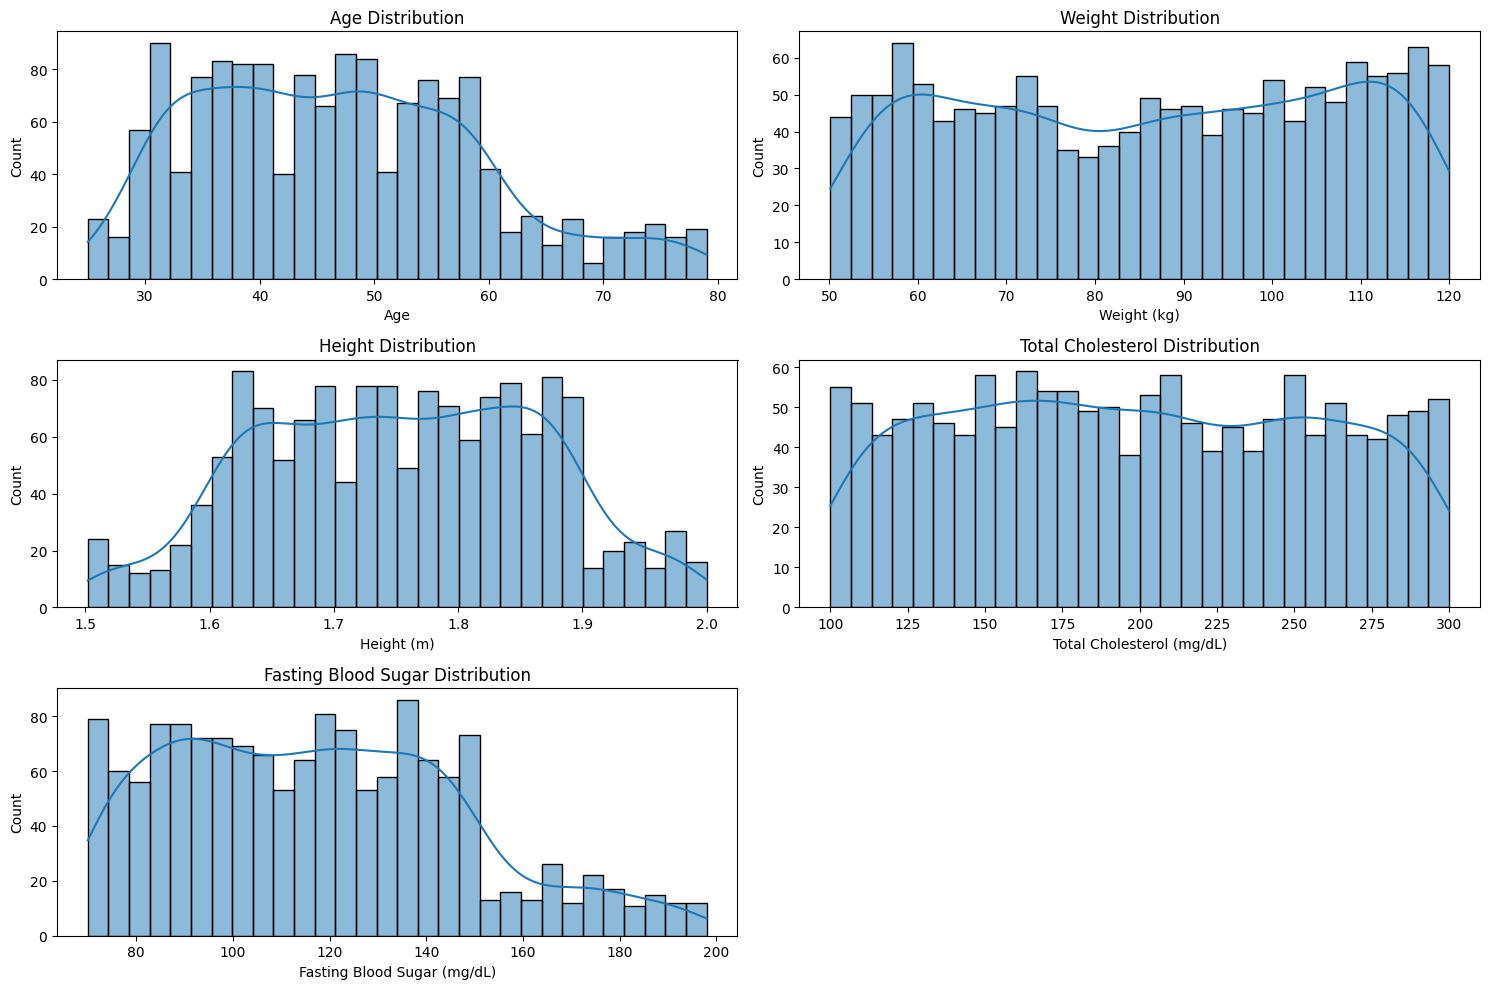

In [20]:
#Distribution of Age, weifht, height,Total Cholesterol, Fasting Blood Sugar
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(df_relevant['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.subplot(3, 2, 2)
sns.histplot(df_relevant['Weight (kg)'], kde=True, bins=30)
plt.title('Weight Distribution')
plt.subplot(3, 2, 3)
sns.histplot(df_relevant['Height (m)'], kde=True, bins=30)
plt.title('Height Distribution')
plt.subplot(3, 2, 4)
sns.histplot(df_relevant['Total Cholesterol (mg/dL)'], kde=True, bins=30)
plt.title('Total Cholesterol Distribution') 
plt.subplot(3, 2, 5)
sns.histplot(df_relevant['Fasting Blood Sugar (mg/dL)'], kde=True, bins=30)
plt.title('Fasting Blood Sugar Distribution')   
plt.tight_layout()


## Filling Missing Values


In [21]:
#Fill missing values 
# Assume df is your DataFrame
df_relevant['Age'] = df_relevant['Age'].fillna(df_relevant['Age'].median())
df_relevant['Weight (kg)'] = df_relevant['Weight (kg)'].fillna(df_relevant['Weight (kg)'].median())

# Cholesterol: simple median
df_relevant['Total Cholesterol (mg/dL)'] = df_relevant['Total Cholesterol (mg/dL)'].fillna(
        df_relevant['Total Cholesterol (mg/dL)'].median())

# Fasting Blood Sugar: log-space mean
fbs = df_relevant['Fasting Blood Sugar (mg/dL)']
log_mean = np.log(fbs.dropna()).mean()
df_relevant['Fasting Blood Sugar (mg/dL)'] = fbs.fillna(np.exp(log_mean))


<Axes: >

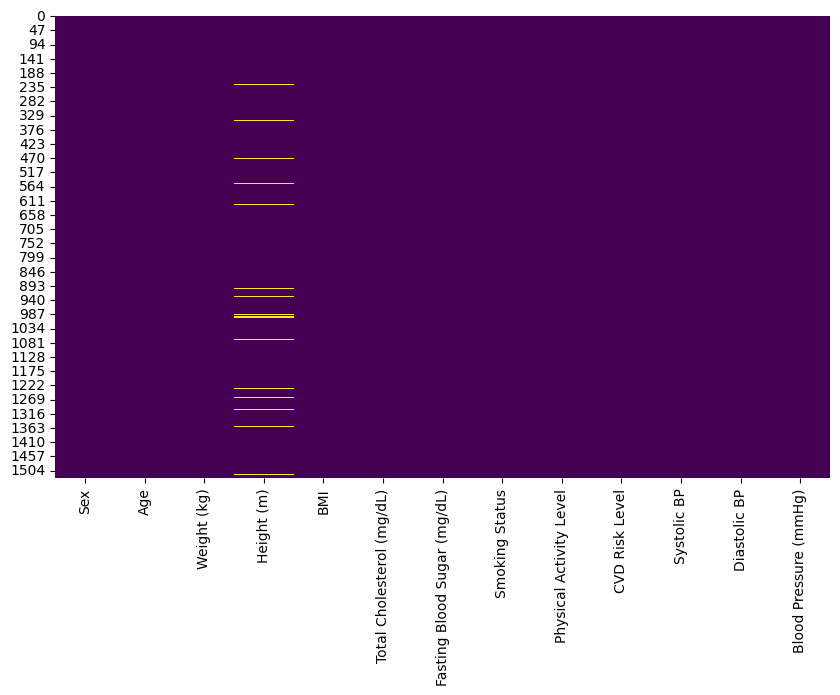

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_relevant.isnull(), cbar=False, cmap='viridis')

## Encoding and Standardising Column Names

In [23]:
def encode_total_cholesterol(value_mg_dl: float) -> int:
    """
    Map a total-cholesterol result to an integer class.
      1 = normal (<200 mg/dL)
      2 = above-normal / borderline (200–239 mg/dL)
      3 = well-above-normal / high (≥240 mg/dL)
    """
    if value_mg_dl < 200:
        return 1
    elif value_mg_dl < 240:   # 200 ≤ value < 240
        return 2
    else:                      # value ≥ 240
        return 3


In [24]:
def encode_fasting_glucose(value_mg_dl: float) -> int:
    """
    Map a fasting blood glucose result to an integer class.
      1 = normal (<100 mg/dL)
      2 = above-normal / prediabetes (100–125 mg/dL)  
      3 = well-above-normal / diabetes (≥126 mg/dL)
    """

    if value_mg_dl < 100:
        return 1
    elif value_mg_dl < 126:   # 100 ≤ value < 126
        return 2
    else:                      # value ≥ 126
        return 3


In [25]:
#Drop height and weight columns as they are not needed anymore
df_relevant.drop(columns=['Height (m)', 'Weight (kg)'], inplace=True)

#Encode Sex with W=1 M = 2
df_relevant['Sex'] = df_relevant['Sex'].replace({'F':1, 'M':2})

#Encode Smoking status with N = 0 Y = 1 
df_relevant['Smoking Status'] = df_relevant['Smoking Status'].replace({'N':0, 'Y':1})

#Encode Total Cholesterol with normal = 1 above normal = 2  Well above normal = 3
df_relevant['Total Cholesterol (mg/dL)'] = df_relevant['Total Cholesterol (mg/dL)'].apply(encode_total_cholesterol)

#Encode CVD with low risk = 0 moderate risk = 1 high risk = 1
df_relevant['CVD Risk Level'] = df_relevant['CVD Risk Level'].replace({'LOW':0, 'INTERMEDIARY':1, 'HIGH':1})

#Convert Fasting Glucose Level to 1: Normal, 2: Above Normal, 3: Well Above Normal
df_relevant['Fasting Blood Sugar (mg/dL)'] = df_relevant['Fasting Blood Sugar (mg/dL)'].apply(encode_fasting_glucose)

#Convert Physical Activity Level to 0: Low, 1: Moderate, 1: High: 1
df_relevant['Physical Activity Level'] = df_relevant['Physical Activity Level'].replace({'Low':0, 'Moderate':1, 'High':1})

#Add Alcohol Consumption column with all rows set to 0 (not provided in the dataset)
df['Alcohol Intake'] = 0


C:\Users\Rafid\AppData\Local\Temp\ipykernel_25168\1043977989.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_relevant['Sex'] = df_relevant['Sex'].replace({'F':1, 'M':2})
C:\Users\Rafid\AppData\Local\Temp\ipykernel_25168\1043977989.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_relevant['Smoking Status'] = df_relevant['Smoking Status'].replace({'N':0, 'Y':1})
C:\Users\Rafid\AppData\Local\Temp\ipykernel_25168\1043977989.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [27]:
#Check unique values in each column
df_relevant = df_relevant.drop(columns=['Blood Pressure (mmHg)'])
df_relevant['Alcohol Intake'] = 0  # Add Alcohol Consumption column with all rows set to 0
for column in df_relevant.columns:
    print(f"Unique values in {column}: {df_relevant[column].unique()}")

Unique values in Sex: [1 2]
Unique values in Age: [32. 55. 46. 44. 58. 33. 37. 38. 48. 41. 57. 40. 39. 34. 35. 36. 53. 47.
 30. 31. 45. 42. 51. 43. 56. 59. 50. 52. 60. 49. 54. 76. 62. 67. 77. 65.
 28. 79. 27. 70. 72. 61. 25. 69. 64. 68. 73. 75. 71. 74. 66. 63. 29. 78.
 26.]
Unique values in BMI: [23.6        41.6        26.9        33.4        28.8        33.7
 35.6        33.1        31.8        28.2        29.5        26.4
 35.7        34.8        43.3        21.5        29.2        17.
 17.5        27.3        35.8        25.         19.4        36.1
 19.5        35.3        37.28824886 32.         22.6        24.1
 17.6        37.3        36.2        24.         19.6        36.7
 23.3        26.1        28.3        23.1        20.8        32.1
 42.9        31.6        36.6        35.4        18.4        42.6
 26.         31.4        20.3        38.2        21.2        24.6
 30.3        35.5        21.         33.2        43.9        42.
 17.1        21.1        39.6        21.3    

In [28]:
#Replace column names with standardised names
df_relevant = df_relevant.rename(columns={
    'Sex': 'Gender',
    'Age': 'Age', 
    'BMI': 'BMI',
    'Total Cholesterol (mg/dL)': 'Cholesterol Level',
    'Fasting Blood Sugar (mg/dL)': 'Glucose Level',
    'Smoking Status': 'Smoking Status',
    'Physical Activity Level': 'Physical Activity',
    'CVD Risk Level': 'Cardiovascular Disease',
    'Systolic BP': 'Systolic Blood Pressure',
    'Diastolic BP': 'Diastolic Blood Pressure',
    'Alcohol Intake': 'Alcohol Intake'
})

## Convert to CSV

In [39]:
df_relevant['BMI'] = df_relevant['BMI'].round(1)  # Round BMI to 1 decimal places
#randomly assign 5% of Males to have alcohol intake set to 1, 1% of females to have alcohol intake set to 1
# Alternative approach using pandas sample method
np.random.seed(42)

# Sample 5% of males and set alcohol intake to 1
male_sample = df_relevant[df_relevant['Gender'] == 2].sample(frac=0.05)
df_relevant.loc[male_sample.index, 'Alcohol Intake'] = 1

# Sample 1% of females and set alcohol intake to 1
female_sample = df_relevant[df_relevant['Gender'] == 1].sample(frac=0.01)
df_relevant.loc[female_sample.index, 'Alcohol Intake'] = 1

df_relevant.to_csv('Dataset_C.csv', index=False)  # Save the cleaned dataset to a CSV file